In [76]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib
import matplotlib.pyplot as plt
from pandasql import sqldf
%matplotlib inline

Determine how much the city collected in parking meter revenue in the Bayview Hunter’s Point neighborhood on 
**May 28th, 2021**. How did that revenue vary over the course of the day? 

Perform the analysis using datasets from the San Francisco open data portal and any analytic tools of your choice. As you work, take note of any challenges you encounter with the data, platform, or experience. 

In [77]:
#Importing data for analysis
sf_neighborhoods ="https://data.sfgov.org/api/geospatial/p5b7-5n3h?method=export&format=Shapefile"
sf_meters = "https://data.sfgov.org/api/views/8vzz-qzz9/rows.csv?accessType=DOWNLOAD"

In [78]:
#reading shape files and crating pandas dataframes
nhood_shape=gpd.read_file(sf_neighborhoods)
#reading CSVs
meters = pd.read_csv(sf_meters)
#had to filter then download this csv because the whole thing was too big for my computer
#so I just took a few days worth of data
rev=pd.read_csv("revenue.csv")

In [79]:
#cleaning up these timestamps
rev['SESSION_START_DT'] = pd.to_datetime(rev['SESSION_START_DT'])
rev['SESSION_END_DT'] = pd.to_datetime(rev['SESSION_END_DT'])

<AxesSubplot:>

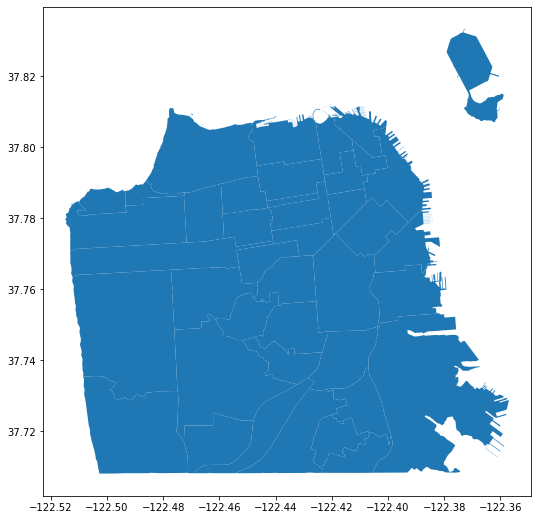

In [80]:
#looking at the data
nhood_shape.plot(figsize=(9,9))
#looks like SF! (though it is missing the edge of alameda which is in SF)

In [124]:
nhood_shape.head(42)

,nhood,geometry
0,Bayview Hunters Point,"POLYGON ((-122.38158 37.75307, -122.38157 37.7..."
1,Bernal Heights,"POLYGON ((-122.40361 37.74934, -122.40378 37.7..."
2,Castro/Upper Market,"POLYGON ((-122.42656 37.76948, -122.42695 37.7..."
3,Chinatown,"POLYGON ((-122.40623 37.79756, -122.40551 37.7..."
4,Excelsior,"POLYGON ((-122.42398 37.73155, -122.42392 37.7..."
5,Financial District/South Beach,"MULTIPOLYGON (((-122.38753 37.78280, -122.3875..."
6,Glen Park,"POLYGON ((-122.44738 37.74648, -122.44728 37.7..."
7,Inner Richmond,"POLYGON ((-122.45932 37.78752, -122.45928 37.7..."
8,Golden Gate Park,"POLYGON ((-122.44092 37.77363, -122.44073 37.7..."
9,Haight Ashbury,"POLYGON ((-122.43200 37.77143, -122.43190 37.7..."


In [82]:
#checking the meters data
meters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34329 entries, 0 to 34328
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OBJECTID                      34329 non-null  int64  
 1   PARKING_SPACE_ID              34329 non-null  int64  
 2   POST_ID                       34329 non-null  object 
 3   MS_PAY_STATION_ID             34329 non-null  object 
 4   MS_SPACE_NUM                  34329 non-null  int64  
 5   SENSOR_FLAG                   34329 non-null  object 
 6   ON_OFFSTREET_TYPE             34329 non-null  object 
 7   OSP_ID                        34269 non-null  float64
 8   JURISDICTION                  34329 non-null  object 
 9   PM_DISTRICT_ID                34328 non-null  float64
 10  BLOCKFACE_ID                  34329 non-null  int64  
 11  ACTIVE_METER_FLAG             34329 non-null  object 
 12  REASON_CODE                   34246 non-null  object 
 13  S

In [83]:
meters.head()

,OBJECTID,PARKING_SPACE_ID,POST_ID,MS_PAY_STATION_ID,MS_SPACE_NUM,SENSOR_FLAG,ON_OFFSTREET_TYPE,OSP_ID,JURISDICTION,PM_DISTRICT_ID,...,NFC_KEY,SPT_CODE,COLLECTION_ROUTE_DESC,COLLECTION_SUBROUTE_DESC,shape,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,5228201,101400,500-08020,-,0,N,ON,0.0,SFMTA,12.0,...,6325,NaN,NaN,NaN,POINT (-122.408394 37.79584),104,104,6,3,6
1,5228280,102036,419-13290,-,0,N,ON,0.0,SFMTA,15.0,...,9EPC,NaN,Franklin St: Unit - 900,Franklin 1200-1500,POINT (-122.423454 37.7872),100,100,4,6,39
2,5229090,109966,671-01050,671-01001,5,Y,ON,0.0,SFMTA,2.0,...,8JGP,NaN,NaN,NaN,POINT (-122.39461 37.780937),31,31,1,10,8
3,5229183,104916,606-15400,-,0,N,ON,0.0,SFMTA,15.0,...,6X57,NaN,NaN,NaN,POINT (-122.42171 37.789528),105,105,4,3,21
4,5229690,107918,418-06100,-,0,E,ON,0.0,SFMTA,2.0,...,3NBT,NaN,NaN,NaN,POINT (-122.397156 37.785294),32,32,1,10,8


In [84]:
#checking the revenue data
rev.head()

,TRANSMISSION_DATETIME,POST_ID,STREET_BLOCK,PAYMENT_TYPE,SESSION_START_DT,SESSION_END_DT,METER_EVENT_TYPE,GROSS_PAID_AMT
0,8319406_11_05272021012800,493-13130,ILLINOIS ST 1300,CREDIT CARD,2021-05-27 01:28:00,2021-05-27 07:01:00,NS,5.50
1,8319407_11_05272021012801,493-13070,ILLINOIS ST 1300,CREDIT CARD,2021-05-27 01:28:01,2021-05-27 02:26:01,NS,1.00
2,8319405_11_05272021012803,700-04520,VALENCIA ST 400,CREDIT CARD,2021-05-27 01:28:03,2021-05-27 02:09:03,NS,3.25
3,8319408_11_05272021012845,700-04440,VALENCIA ST 400,CREDIT CARD,2021-05-27 01:28:45,2021-05-27 03:56:45,NS,11.78
4,211408233_4_05272021014343,562-26110,MASON ST 2600,CASH,2021-05-27 01:43:43,2021-05-27 01:43:43,NS,0.50


In [85]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211756 entries, 0 to 211755
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   TRANSMISSION_DATETIME  211756 non-null  object        
 1   POST_ID                211756 non-null  object        
 2   STREET_BLOCK           211756 non-null  object        
 3   PAYMENT_TYPE           211756 non-null  object        
 4   SESSION_START_DT       211756 non-null  datetime64[ns]
 5   SESSION_END_DT         211756 non-null  datetime64[ns]
 6   METER_EVENT_TYPE       211756 non-null  object        
 7   GROSS_PAID_AMT         211756 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 12.9+ MB


##Analysis time!
I realized that analysis neighborhood is in the meters dataset, so I actually don't need the shape file. Furthermore, Bayview/Hunters-Point is neighborhood "1" as it is in alphabetical order (I spot checked parking meters just to make sure) 


In [86]:
#spot-checking parking meters to make sure that neighborhood 1 is in fact HP/BV
test = sqldf(
"""
select
*
from meters
where post_id = '203-51110'
""")

In [87]:
test.head()

,OBJECTID,PARKING_SPACE_ID,POST_ID,MS_PAY_STATION_ID,MS_SPACE_NUM,SENSOR_FLAG,ON_OFFSTREET_TYPE,OSP_ID,JURISDICTION,PM_DISTRICT_ID,...,NFC_KEY,SPT_CODE,COLLECTION_ROUTE_DESC,COLLECTION_SUBROUTE_DESC,shape,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,5232200,108293,203-51110,-,0,N,ON,0.0,SFMTA,34.0,...,ISHC,None,3rd St: 4600 - 5100,3rd St,POINT (-122.39151 37.732033),86,86,2,9,1


In [129]:
##compared to other neighborhoods
meters_rev = sqldf(
"""
SELECT
"Analysis Neighborhoods" as analysis_nhood,
m.POST_ID as post_id,
TRANSMISSION_DATETIME as txn_id,
PAYMENT_TYPE as payment_type,
SESSION_START_DT as session_start_dt,
GROSS_PAID_AMT as gross_paid_amt
FROM meters m
LEFT JOIN rev r on m.POST_ID = r.POST_ID
WHERE SESSION_START_DT between '2021-05-28' and '2021-05-29'
""")

In [130]:
meters_rev['gross_paid_amt'].sum()

164723.13

In [163]:
#checking revenue per meter
meters_agg = sqldf(
"""
SELECT
analysis_nhood,
count(distinct post_id) as meters,
count(txn_id) as txn,
sum(gross_paid_amt) as revenue,
sum(gross_paid_amt)/count(distinct post_id) as rev_per_meter,
sum(gross_paid_amt)/count(distinct txn_id) as rev_per_txn
from meters_rev
GROUP BY 1
ORDER BY 4
""")

In [164]:
meters_agg.head(41)

,analysis_nhood,meters,txn,revenue,rev_per_meter,rev_per_txn
0,1,37,59,49.58,1.340000,0.840339
1,16,20,37,50.64,2.532000,1.368649
2,12,9,34,75.60,8.400000,2.223529
3,40,44,174,125.76,2.858182,0.722759
4,24,40,179,163.44,4.086000,0.913073
5,10,47,302,321.34,6.837021,1.064040
6,18,80,383,468.52,5.856500,1.223290
7,25,138,948,907.92,6.579130,0.957722
8,7,186,1151,1204.06,6.473441,1.046099
9,28,198,1275,1337.60,6.755556,1.049098


In [142]:
meters_rev_bv = sqldf(
"""
SELECT
strftime ('%H',session_start_dt) as hour,
payment_type,
gross_paid_amt
FROM meters_rev
WHERE session_start_dt between '2021-05-28' and '2021-05-29'
AND analysis_nhood = 1
GROUP BY 1,2
""")

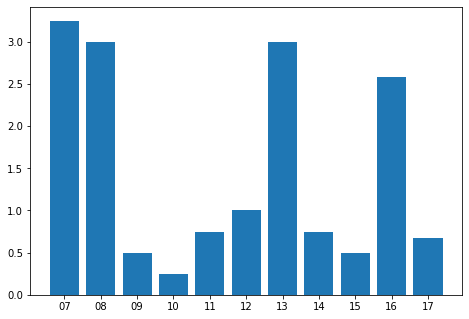

In [160]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(meters_rev_bv['hour'], meters_rev_bv['gross_paid_amt'])
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(meters_rev_bv['hour'], meters_rev_bv['gross_paid_amt'])
plt.show()